## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0,20)
y = -2*x + 1

In [3]:
X = np.ones((len(x),2))
X[:,1] = x

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def LR(X, y, batch_size, alpha= 0.001, epochs=1000):
    m = batch_size
    theta = np.zeros((X.shape[1])) 
    theta_values =[[],[]]
    cost_values = []                   
    
    
    for i in range(epochs):
        for j in range(0, X.shape[0],batch_size):
            #load next batch:
            x_b = X[j:j+batch_size, :]
            y_b = y[j:j+batch_size]
            
            hyp = x_b @ theta    #equal to np.dot(X,theta)
            z = hyp -y_b
            cost = np.mean(z**2)/2
            cost_values.append(cost)
            dtheta = (x_b.T @ z)/m
            theta -= alpha*dtheta
            theta_values[0].append(theta[0])
            theta_values[1].append(theta[1])
            
        if np.linalg.norm(dtheta, ord=2) <= 0.01:
            print(f"program stopped at the {i}th epoch")
            break

    print(f"Final Cost={cost_values[-1]}")
    print(f"Final Gradient={np.linalg.norm(dtheta,ord=2)}")
    return theta, cost_values ,theta_values

#### Try your function with any input parameterss of your choice.

In [5]:
#Using batch GD:
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.001, epochs=100)

Final Cost=0.15977955407302746
Final Gradient=0.28610949075164965


#### Calculate r2 score

In [6]:
y_predict = X @ theta

In [7]:
print("R2 score=", metrics.r2_score(y, y_predict))

R2 score= 0.9976984742382373


#### Plot loss vs. epochs

In [8]:
def plot_cost(cost, x=None):
    if x == None:
        plt.plot(cost)
        plt.title("Cost per iteration")
        plt.xlabel("iterations"), plt.ylabel("Cost")
    else:
        plt.plot(x, cost)
        plt.title("Cost per theta")
        plt.xlabel("theta"), plt.ylabel("Cost")
    plt.grid()
    plt.show()

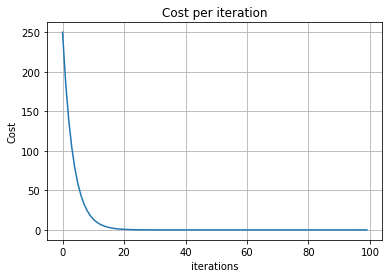

In [9]:
plot_cost(cost)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

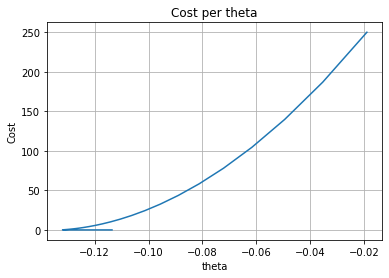

In [10]:
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])

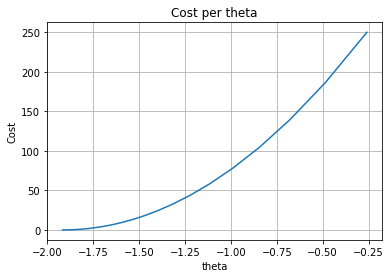

In [11]:
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])

#### Plot all regression lines till converge

In [12]:
def plot_lines(x, y, theta_values):
    plt.scatter(x,y, label="Original Data")
    for th0,th1 in zip(theta_values[0],theta_values[1]):
        y_predict = th0 + th1*x
        plt.plot(x, y_predict, "r", alpha=0.4)
        plt.grid()
    plt.legend()
    plt.show()

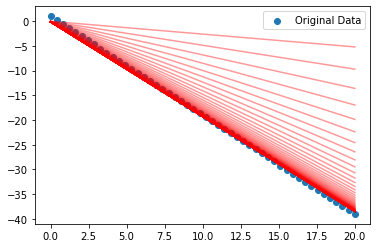

In [13]:
plot_lines(x, y, theta_values)

#### Plot the best regression line

In [14]:
y_predict = X @ theta
def plot_best_line(x, y, y_predict):
    plt.scatter(x, y, marker="+", label = "Original Data", alpha=0.7)
    plt.plot(x,y_predict, "r", label = "Predicted Line")
    plt.xlabel("X"), plt.ylabel("y"), plt.title("Predicted vs. Original")
    plt.legend()
    plt.grid()
    plt.show()

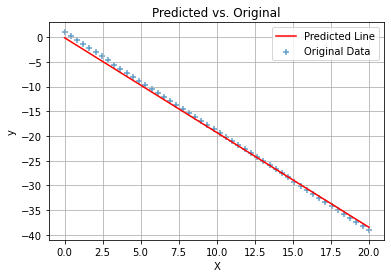

In [15]:
plot_best_line(x, y, y_predict)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

Final Cost=0.10115679297295861
Final Gradient=0.2276507750819432


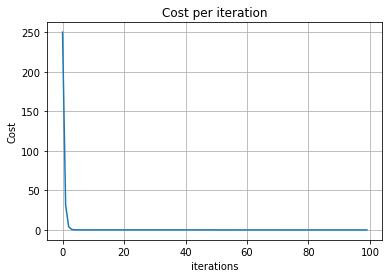

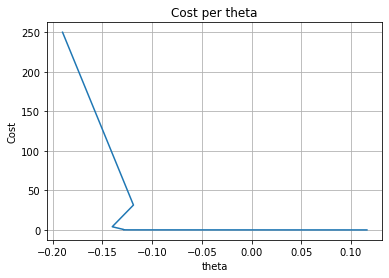

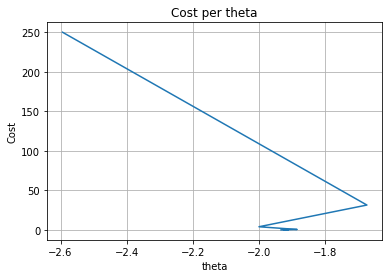

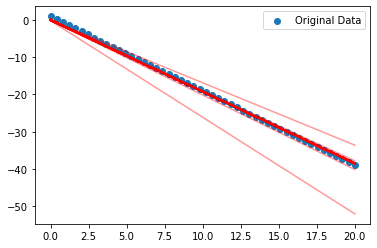

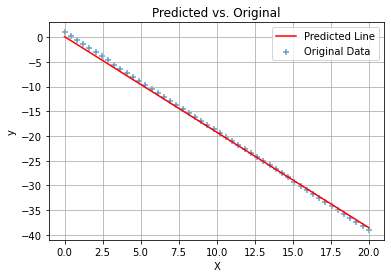

In [16]:
#slightly increase learning rate:
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.01, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=7.695277583360043e+219
Final Gradient=1.4437664791573512e+111


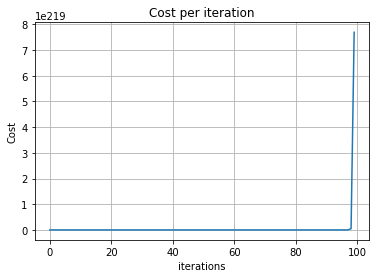

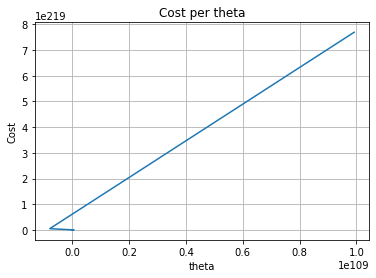

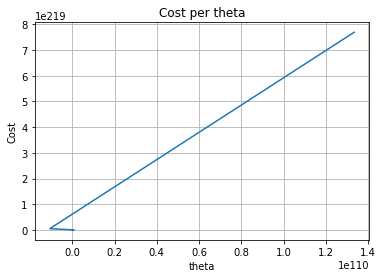

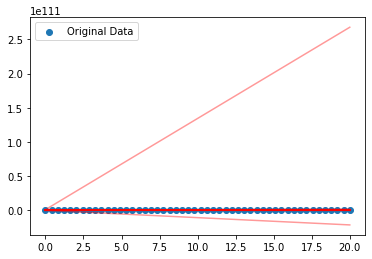

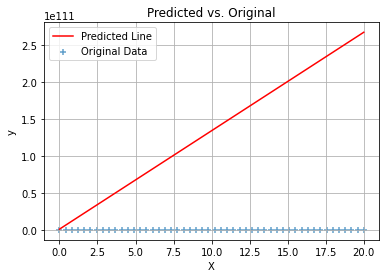

In [17]:
#greatly increase learning rate:
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.1, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=28.76891885001424
Final Gradient=88.02007086744867


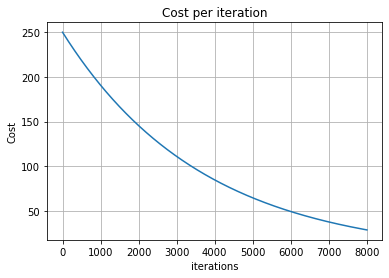

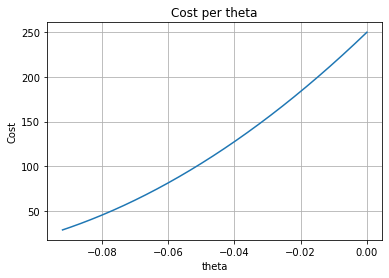

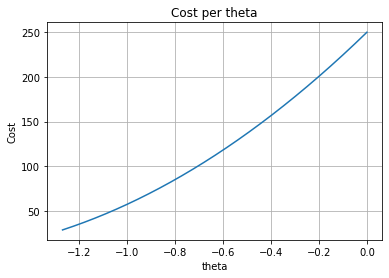

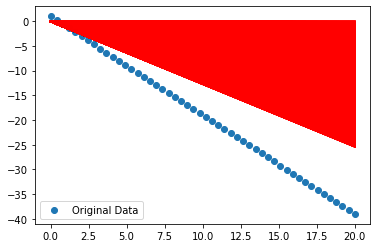

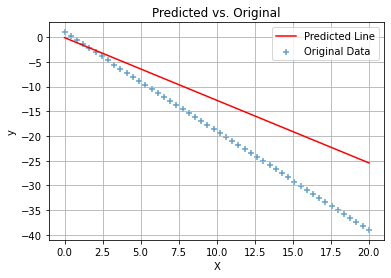

In [18]:
#Very Small learning rate and large no. of epochs:
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.000001, epochs=8000)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.002789691057892599
Final Gradient=0.037805036556183086


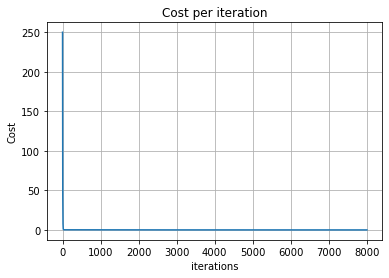

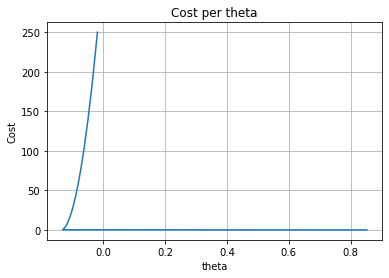

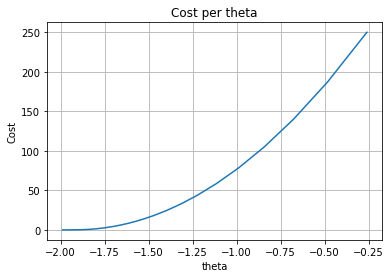

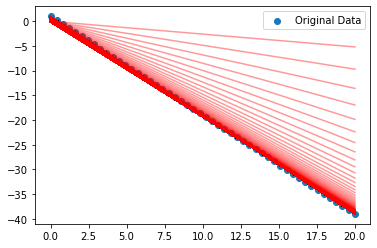

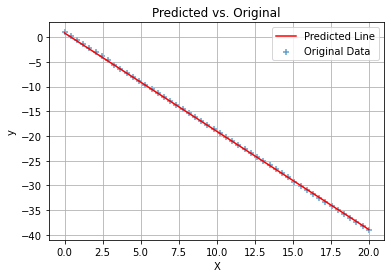

In [19]:
#large no. of epochs
theta, cost ,theta_values = LR(X, y, batch_size=len(y), alpha= 0.001, epochs=8000)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

Final Cost=0.0062478791447422265
Final Gradient=2.2118713558370096


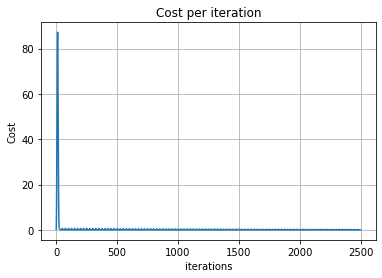

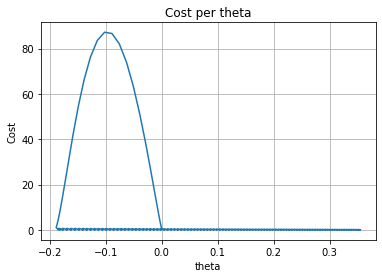

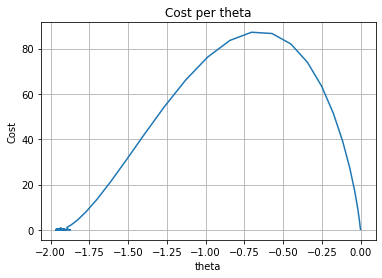

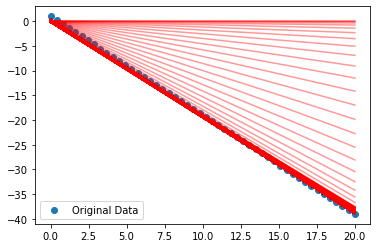

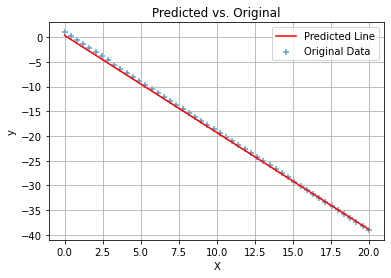

In [20]:
#Batch size = 2
theta, cost ,theta_values = LR(X, y, batch_size=2, alpha= 0.001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.04922723528039531
Final Gradient=6.007927363559603


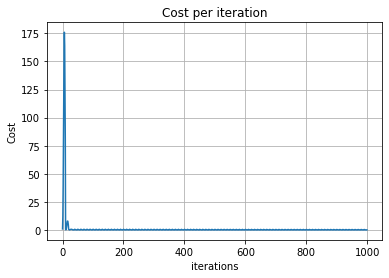

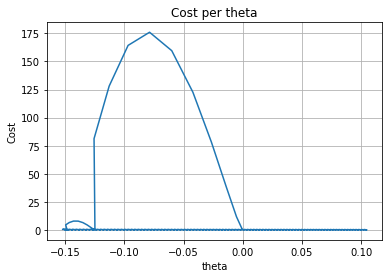

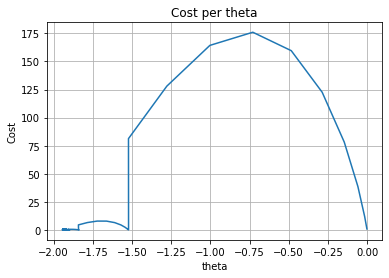

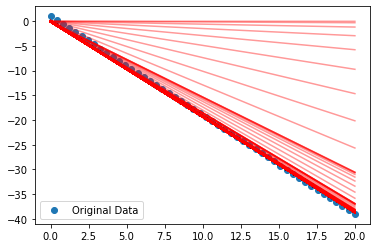

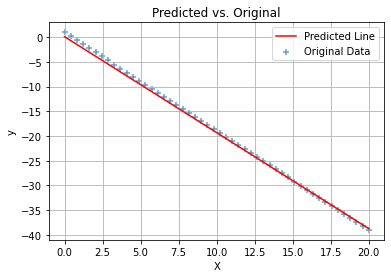

In [21]:
#Batch size = 5
theta, cost ,theta_values = LR(X, y, batch_size=5, alpha= 0.001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.06817671501957302
Final Gradient=6.62586215896431


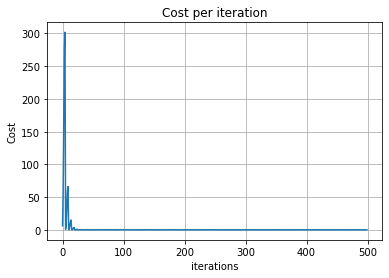

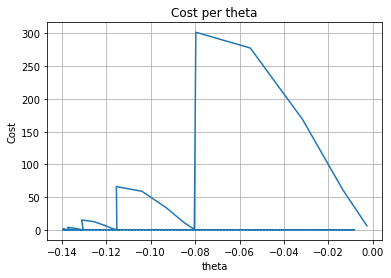

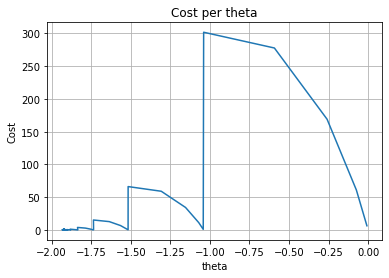

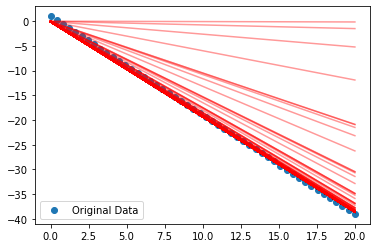

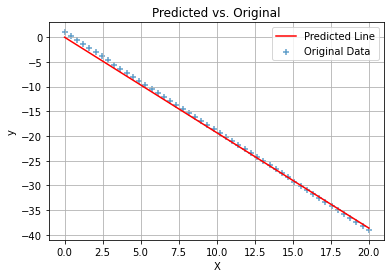

In [22]:
#Batch size = 10
theta, cost ,theta_values = LR(X, y, batch_size=10, alpha= 0.001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.01704563604193938
Final Gradient=2.1539762710906887


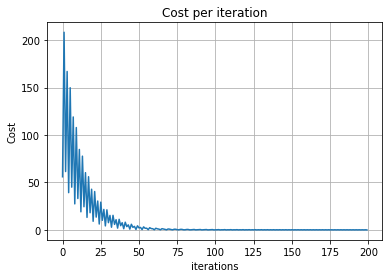

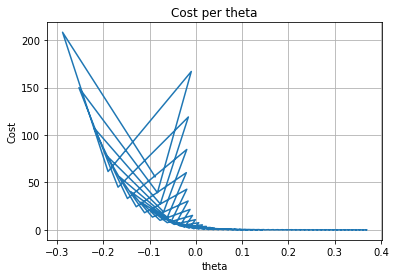

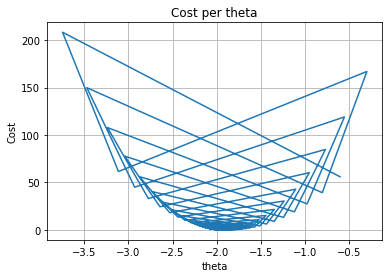

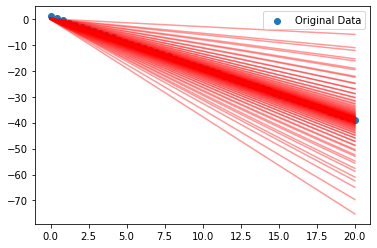

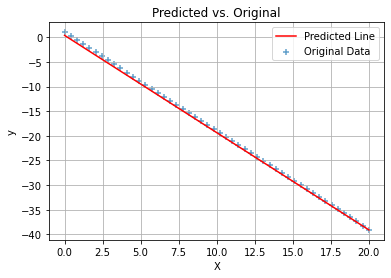

In [23]:
#Batch size = 25 , learning rate = 0.01
theta, cost ,theta_values = LR(X, y, batch_size=25, alpha= 0.01, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.08557952572623514
Final Gradient=1.3663349277380148


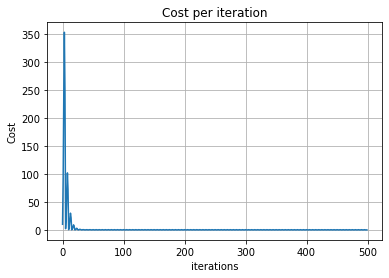

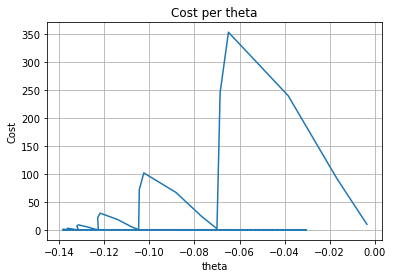

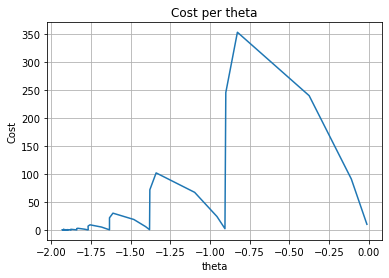

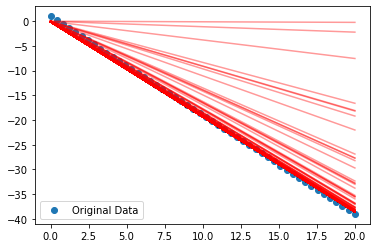

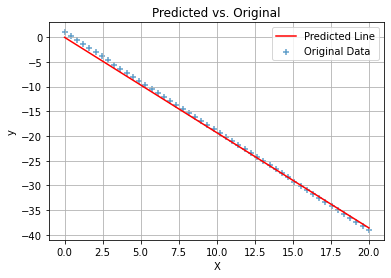

In [24]:
#Batch size = 12
theta, cost ,theta_values = LR(X, y, batch_size=12, alpha= 0.001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

program stopped at the 83th epoch
Final Cost=2.6276708138316013e-07
Final Gradient=0.009944150040027508


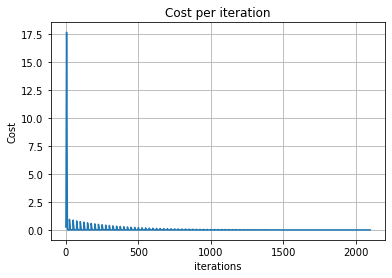

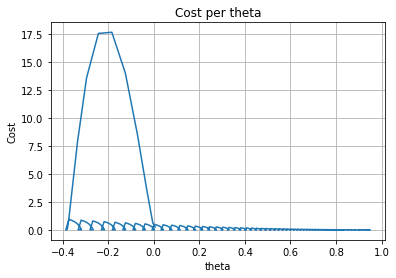

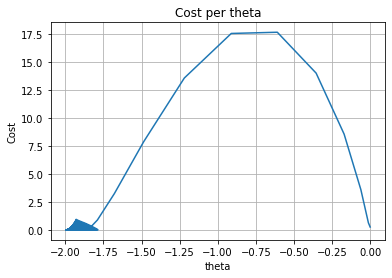

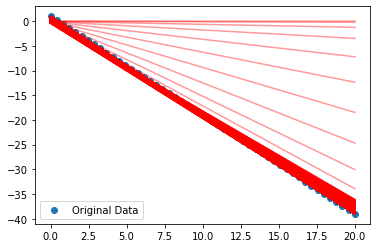

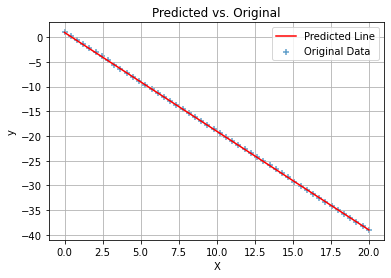

In [25]:
#Batch size = 2, learning rate= 0.01
theta, cost ,theta_values = LR(X, y, batch_size=2, alpha= 0.01, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

program stopped at the 83th epoch
Final Cost=2.6276708138316013e-07
Final Gradient=0.009944150040027508


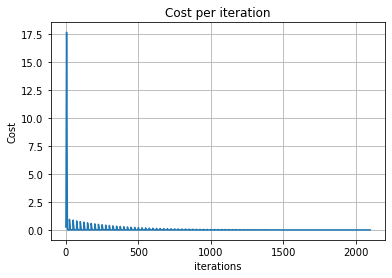

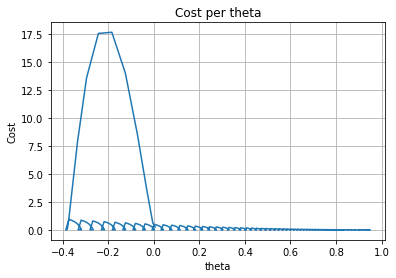

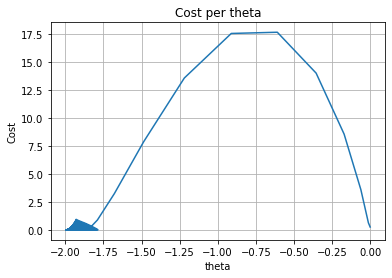

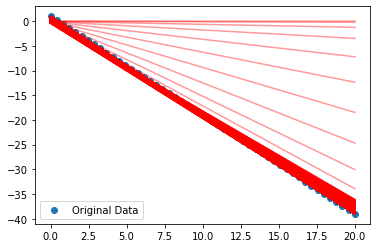

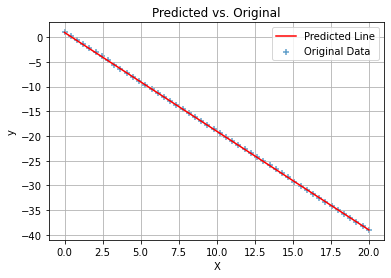

In [26]:
#Batch size = 25, learning rate = 0.01
theta, cost ,theta_values = LR(X, y, batch_size=2, alpha= 0.01, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

Final Cost=0.0003607581427101927
Final Gradient=0.5378922108132582


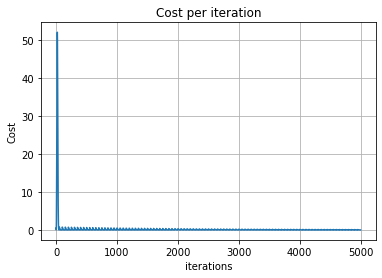

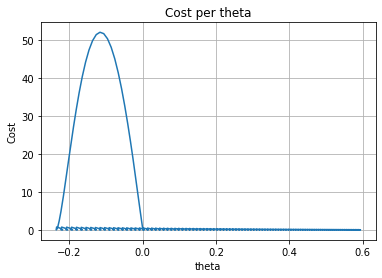

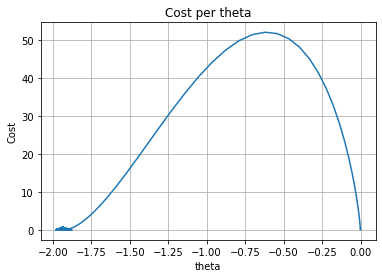

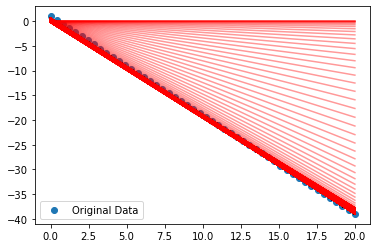

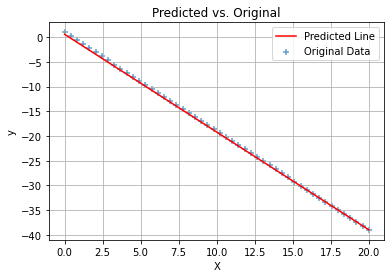

In [27]:
#learning rate = 0.001
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

program stopped at the 41th epoch
Final Cost=1.1978618005341496e-07
Final Gradient=0.009801454810528833


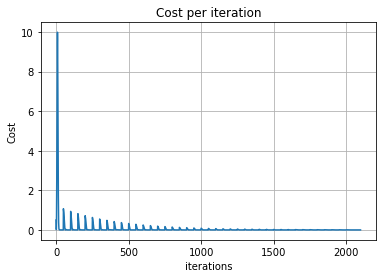

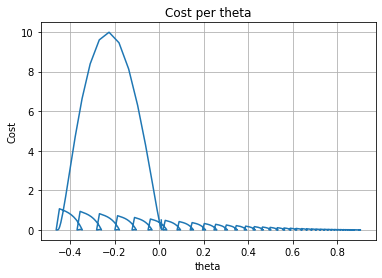

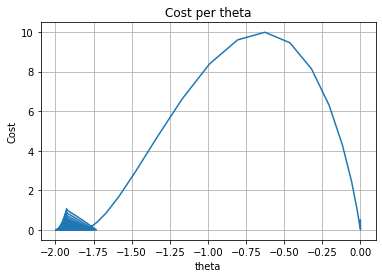

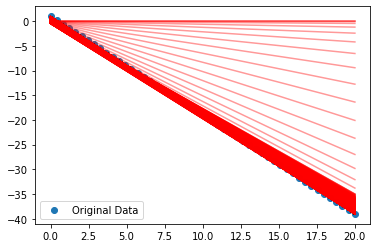

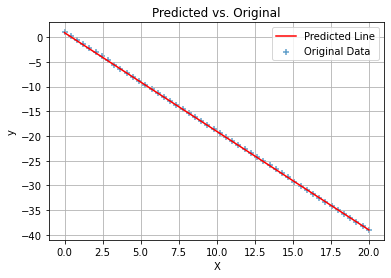

In [28]:
#learning rate = 0.01
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.01, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.08442527697120511
Final Gradient=8.228552249995529


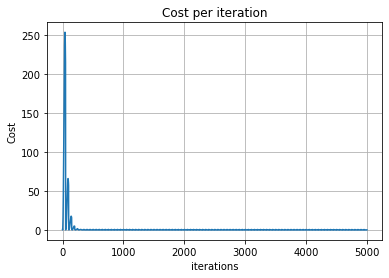

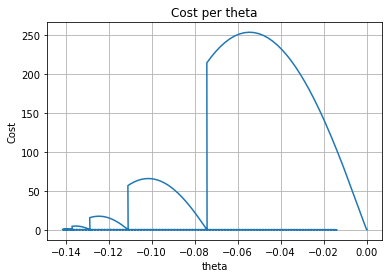

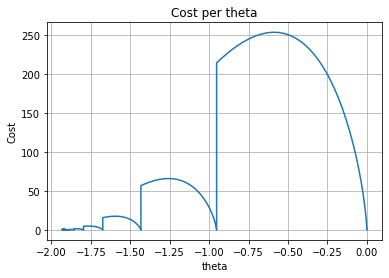

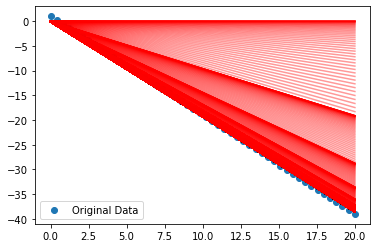

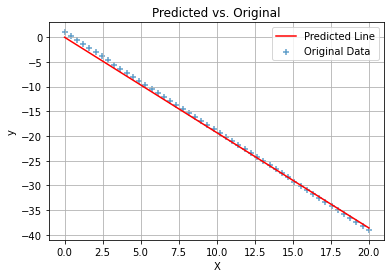

In [29]:
#learning rate = 0.0001
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.0001, epochs=100)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.002708445786557793
Final Gradient=1.4738295426606667


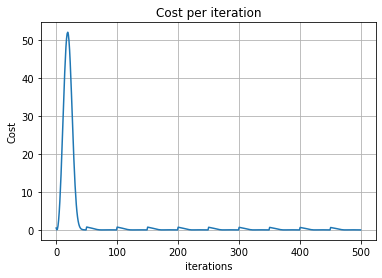

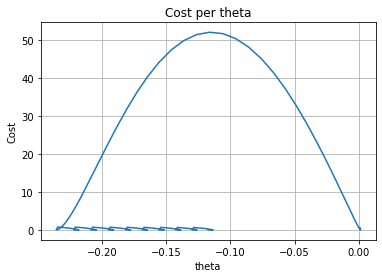

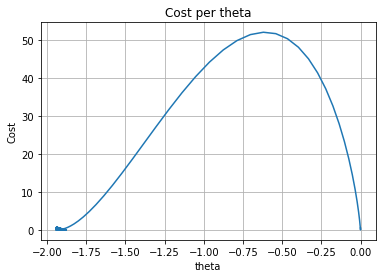

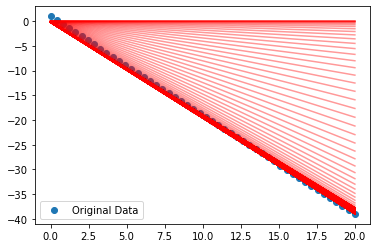

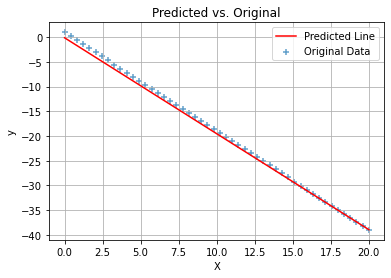

In [30]:
#learning rate = 0.001, epochs= 10
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.001, epochs=10)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=0.005780551248388518
Final Gradient=2.153137733914761


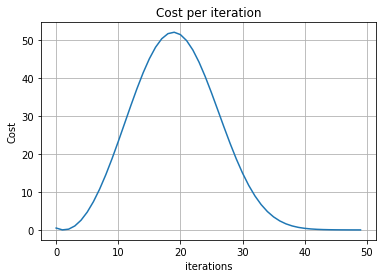

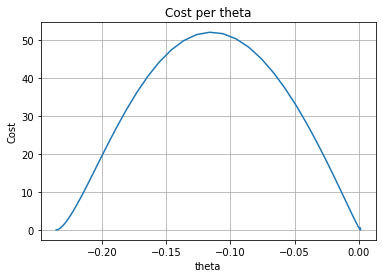

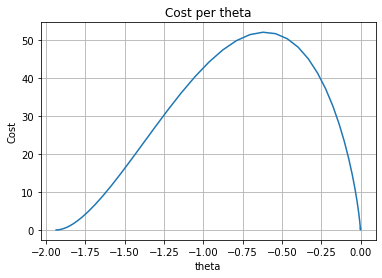

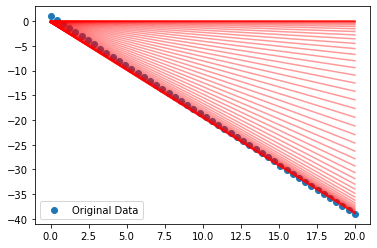

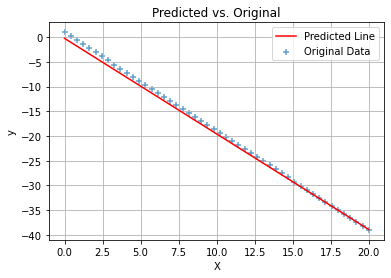

In [31]:
#learning rate = 0.001, epochs =1
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.001, epochs=1)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)

Final Cost=nan
Final Gradient=nan


<ipython-input-4-b215bbf1487e>:16: RuntimeWarning: overflow encountered in square
  cost = np.mean(z**2)/2
<ipython-input-4-b215bbf1487e>:18: RuntimeWarning: overflow encountered in matmul
  dtheta = (x_b.T @ z)/m
<ipython-input-4-b215bbf1487e>:19: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha*dtheta


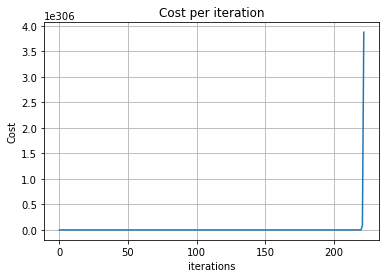

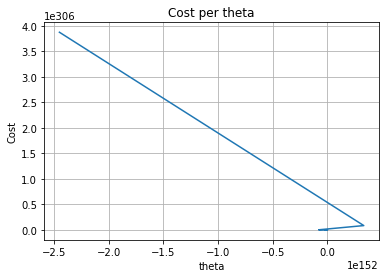

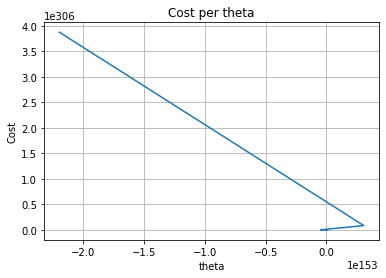

<ipython-input-12-4b9849ab7e9f>:4: RuntimeWarning: invalid value encountered in multiply
  y_predict = th0 + th1*x


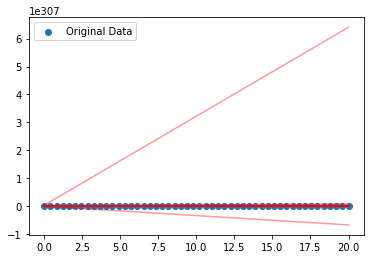

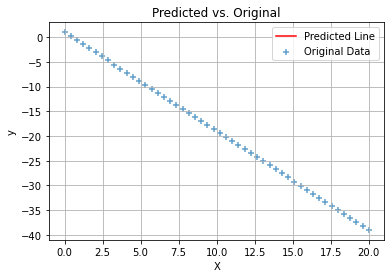

In [32]:
#learning rate = 0.1
theta, cost ,theta_values = LR(X, y, batch_size=1, alpha= 0.1, epochs=10)
y_predict = X @ theta
plot_cost(cost)
#Cost vs. theta_0:
plot_cost(cost, theta_values[0])
#Cost vs. theta_1:
plot_cost(cost, theta_values[1])
plot_lines(x, y, theta_values)
plot_best_line(x, y, y_predict)